In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [10]:
# Load dataset
data = pd.read_csv("../data/Epileptic_Seizure_Recognition.csv")

# Extract features and labels
X = data.iloc[:, 1:-1]
y = data['y']

# Convert labels to binary
y_binary = y.apply(lambda label: 0 if label == 1 else 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9252173913043479

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.63      0.77       460
           1       0.92      1.00      0.96      1840

    accuracy                           0.93      2300
   macro avg       0.95      0.82      0.86      2300
weighted avg       0.93      0.93      0.92      2300



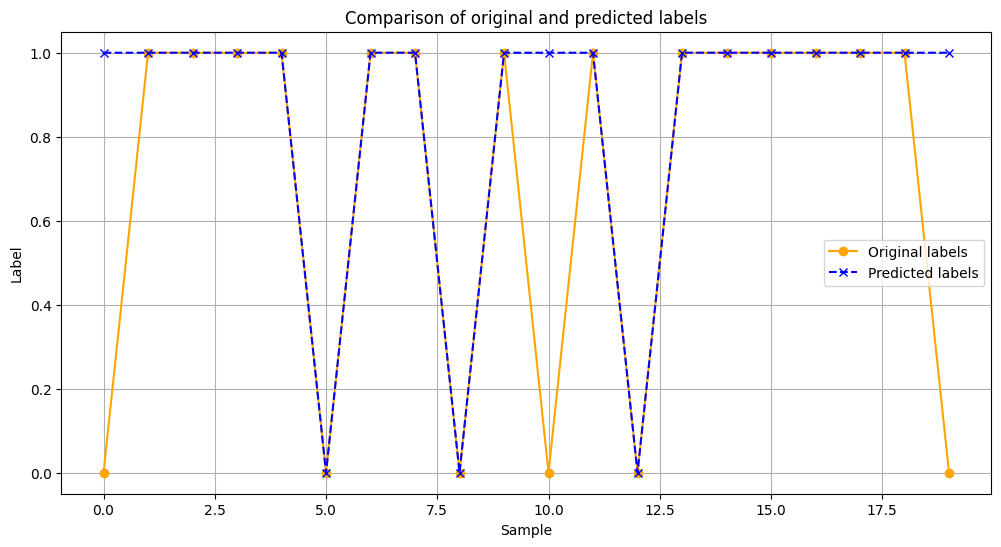

In [7]:
# Plot comparison of original and predicted labels
num_samples_to_plot = 20
indices = np.arange(num_samples_to_plot)
original_labels = y_test[:num_samples_to_plot].reset_index(drop=True)
predicted_labels = y_pred[:num_samples_to_plot]

plt.figure(figsize=(12, 6))
plt.plot(indices, original_labels, marker='o', linestyle='-', color='orange', label='Original labels')
plt.plot(indices, predicted_labels, marker='x', linestyle='--', color='blue', label='Predicted labels')
plt.xlabel("Sample")
plt.ylabel("Label")
plt.title("Comparison of original and predicted labels")
plt.legend()
plt.grid(True)
plt.show()